In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
import re
import os
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=8,8
file_path = '/content/'
print(os.listdir(file_path))

['.config', 'winemag-data-130k-v2.csv', 'winemag-data_first150k.csv', 'winemag-data-130k-v2.json', 'sample_data']


In [2]:
wine_data = pd.read_csv('/content/winemag-data-130k-v2.csv')

In [3]:
print("Wine Data Dimension:",wine_data.shape)
wine_data.head(3)

Wine Data Dimension: (129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


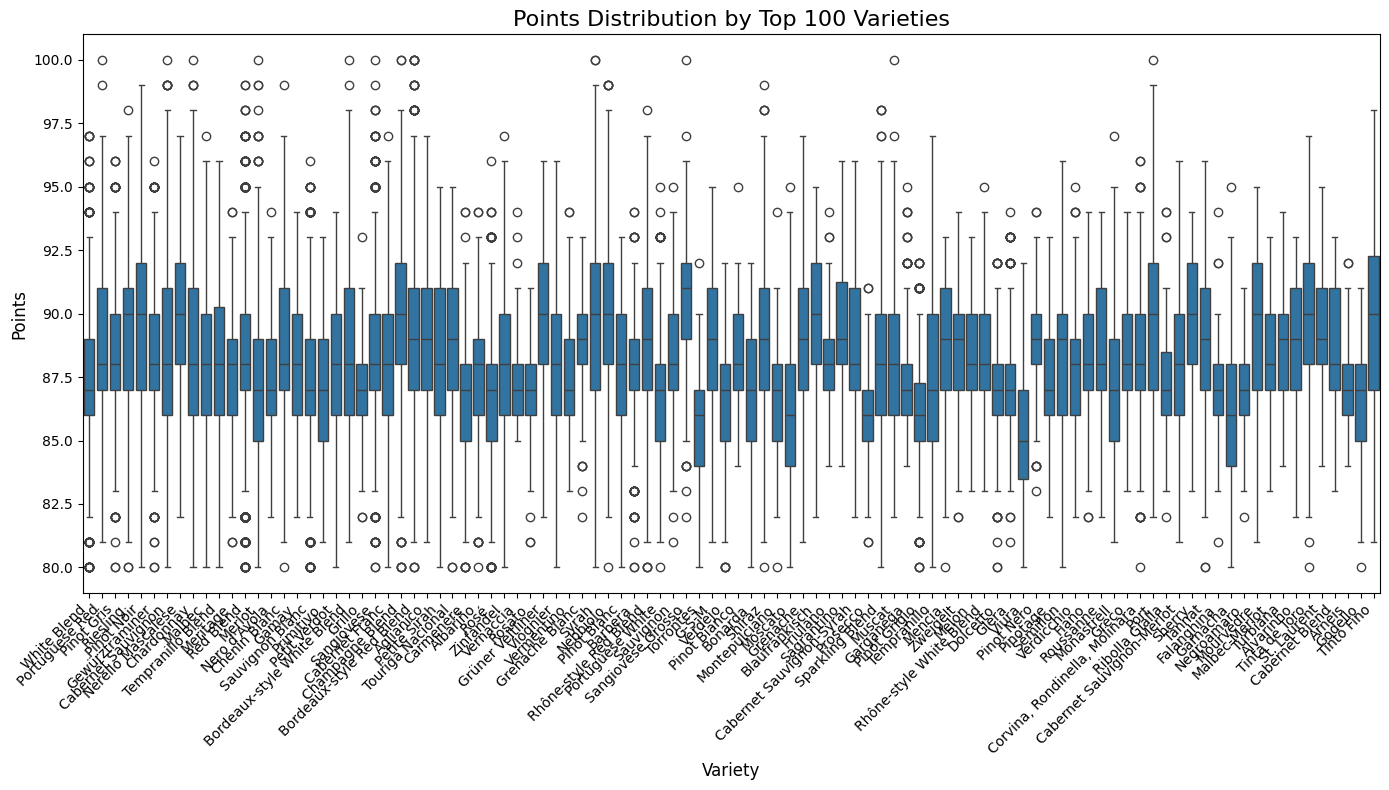

In [4]:
top_varieties = wine_data['variety'].value_counts().head(100).index
plt.figure(figsize=(14, 8))
sns.boxplot(x='variety', y='points', data=wine_data[wine_data['variety'].isin(top_varieties)])
plt.xticks(rotation=45, ha='right')
plt.title("Points Distribution by Top 100 Varieties", size=16)
plt.xlabel("Variety", size=12)
plt.ylabel("Points", size=12)
plt.tight_layout()
plt.show()

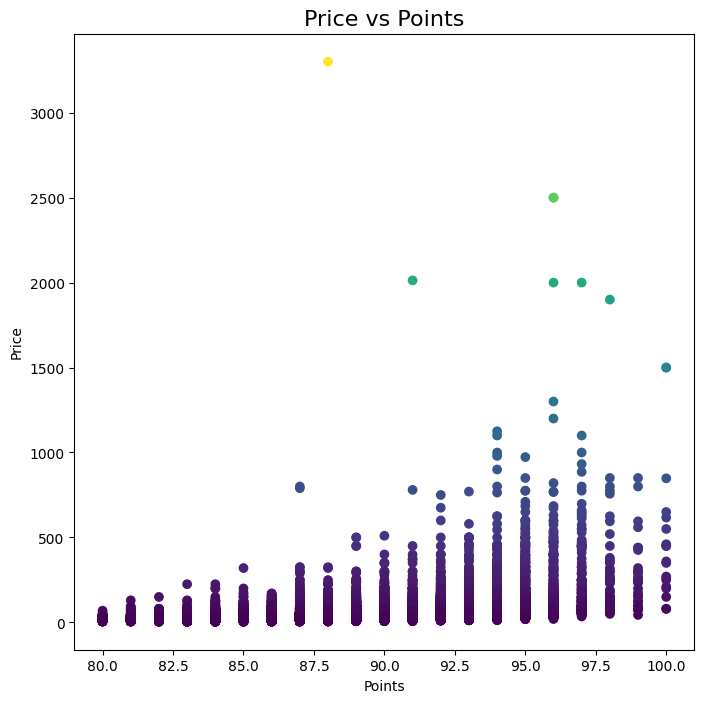

In [5]:
import matplotlib.pyplot as plt
plt.scatter(wine_data['points'], wine_data['price'], c=wine_data['price'], cmap='viridis')
plt.title("Price vs Points", size=16)
plt.xlabel('Points')
_ = plt.ylabel('Price')

In [6]:
wine_data.tail(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [7]:
wine_data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [8]:
wine_data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [9]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


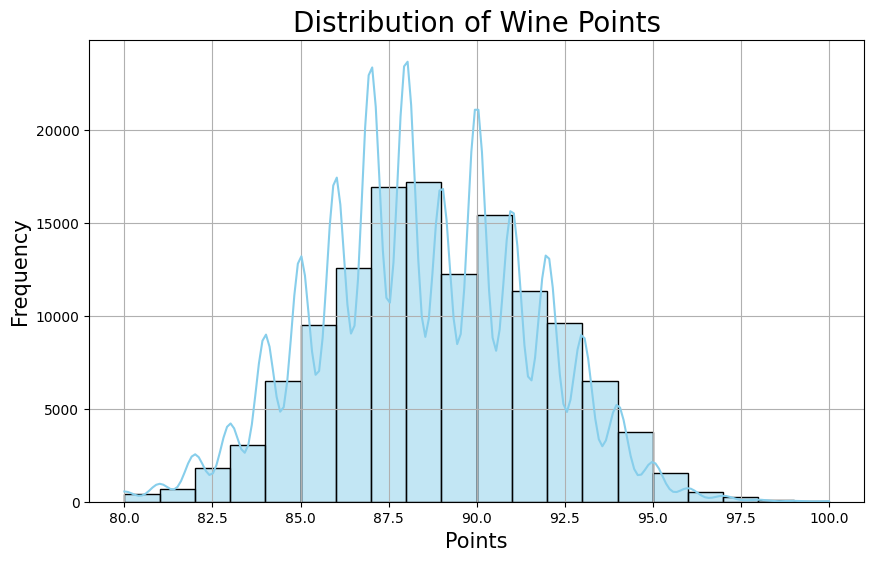

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(wine_data.points, kde=True, bins=20, color='skyblue')
plt.xlabel("Points", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Distribution of Wine Points", size=20)
plt.grid(True)
plt.show()

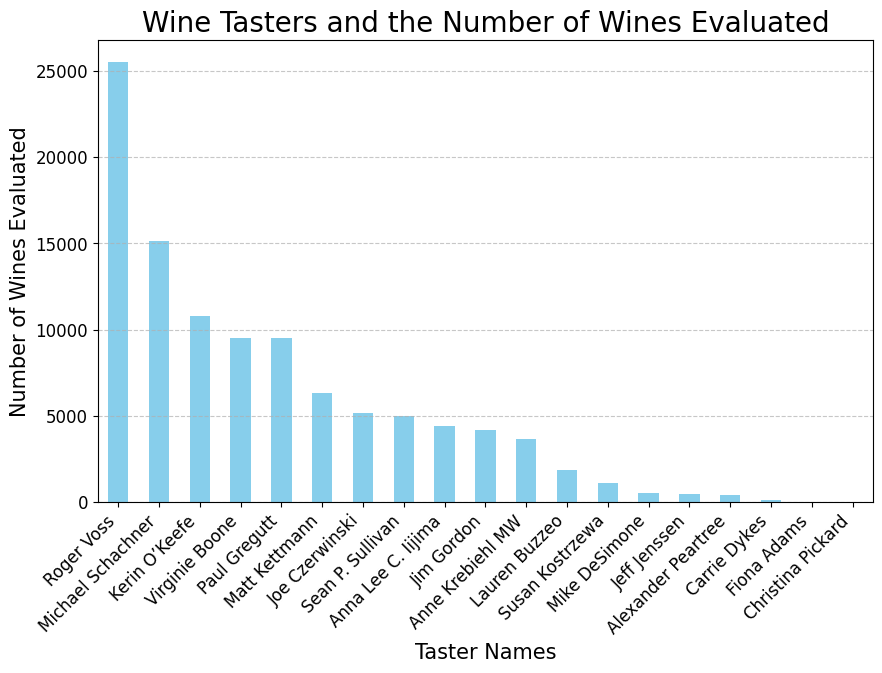

In [11]:
plt.figure(figsize=(10, 6))
wine_data['taster_name'].value_counts().plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Taster Names", size=15)
plt.ylabel("Number of Wines Evaluated", size=15)
plt.title("Wine Tasters and the Number of Wines Evaluated", size=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
wine_data = wine_data[(wine_data['taster_name']=='Roger Voss') | (wine_data['taster_twitter_handle']=='@vossroger')]
print("Wine Data Sample Dimension:",wine_data.shape,"(i.e. Wines evaluated by Roger Voss)")
wine_data.head()

Wine Data Sample Dimension: (25514, 14) (i.e. Wines evaluated by Roger Voss)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone


In [13]:
wine_data.describe()

,Unnamed: 0,points,price
count,25514.000000,25514.000000,20172.000000
mean,64480.295524,88.708003,38.649960
std,37486.514606,3.036373,71.540473
min,1.000000,80.000000,5.000000
25%,32051.250000,86.000000,15.000000
50%,63917.500000,88.000000,22.000000
75%,96872.750000,91.000000,40.000000
max,129970.000000,100.000000,3300.000000


In [14]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25514 entries, 1 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             25514 non-null  int64  
 1   country                25512 non-null  object 
 2   description            25514 non-null  object 
 3   designation            17963 non-null  object 
 4   points                 25514 non-null  int64  
 5   price                  20172 non-null  float64
 6   province               25512 non-null  object 
 7   region_1               18635 non-null  object 
 8   region_2               2 non-null      object 
 9   taster_name            25514 non-null  object 
 10  taster_twitter_handle  25514 non-null  object 
 11  title                  25514 non-null  object 
 12  variety                25514 non-null  object 
 13  winery                 25514 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 2.9+ MB


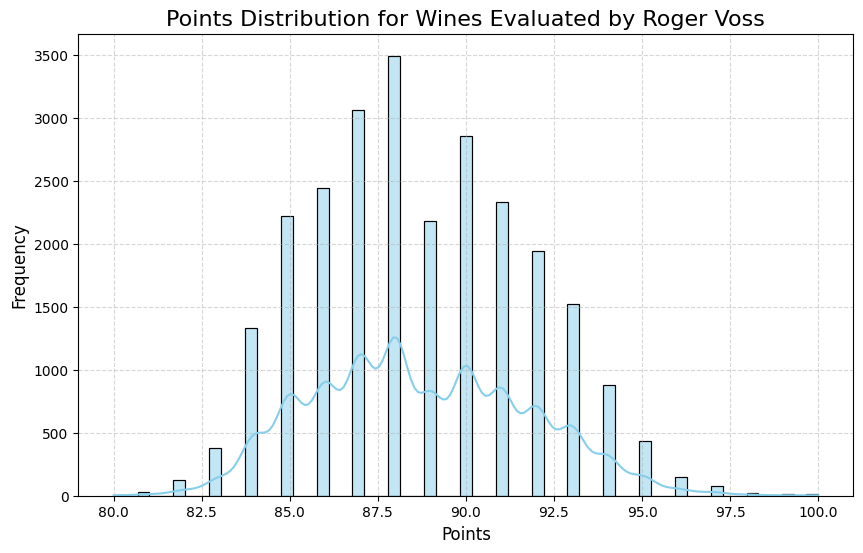

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(wine_data.points, kde=True, color='skyblue')
plt.xlabel("Points", size=12)
plt.ylabel("Frequency", size=12)
plt.title("Points Distribution for Wines Evaluated by Roger Voss", size=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

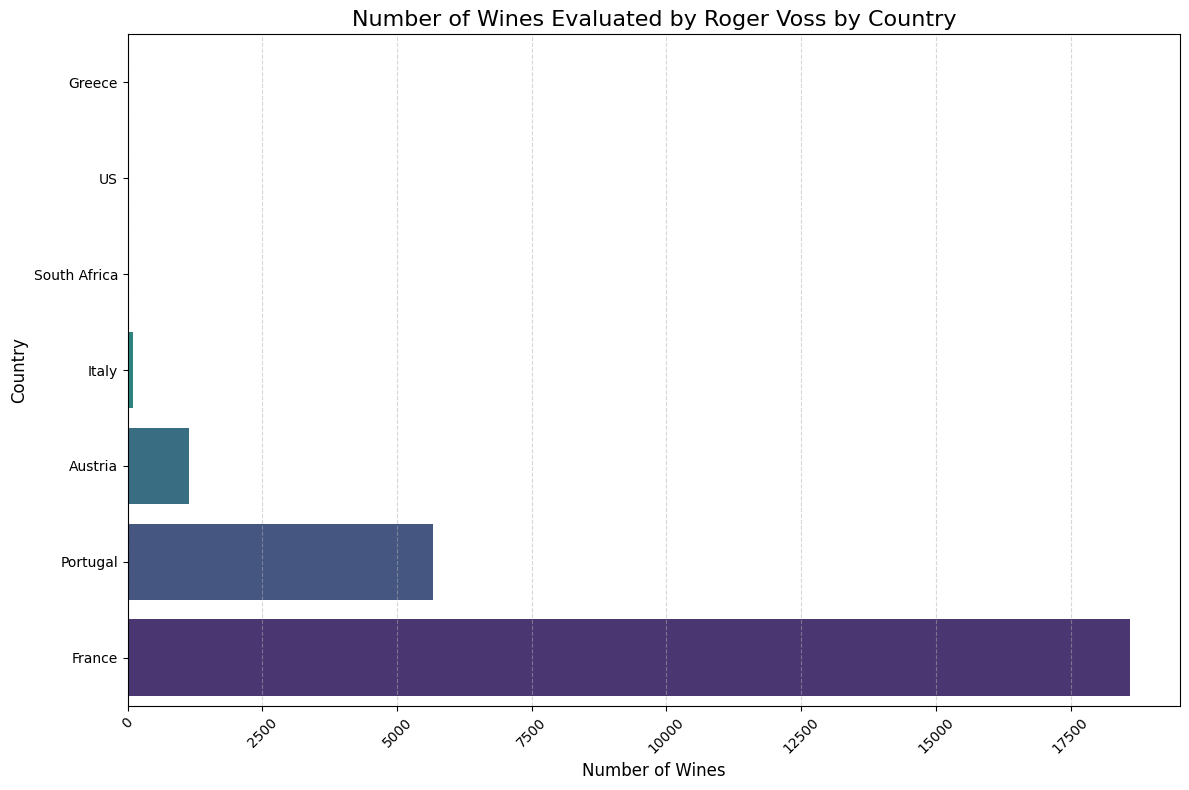

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=wine_data, palette='viridis', order=wine_data['country'].value_counts().index)
plt.xlabel('Number of Wines', size=12)
plt.ylabel('Country', size=12)
plt.title('Number of Wines Evaluated by Roger Voss by Country', size=16)
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [17]:
wine_data.rename(columns={'serial':'wine_Id'}, inplace=True)
wine_data.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [18]:
print(wine_data.duplicated(subset=None, keep='first').sum(),"duplicate record(s)")

0 duplicate record(s)


In [19]:
#@title feature extraction
wine_data['year'] = wine_data['title'].str.extract('(\d\d\d\d)', expand=True)

In [20]:
wine_data['year'].isnull().value_counts()

year
False    23867
True      1647
Name: count, dtype: int64

In [21]:
wine_data.title[wine_data['year'].isnull()].head()

63       Roland Champion NV Brut Rosé  (Champagne)
69                Collet NV Brut Rosé  (Champagne)
334    Jacquart NV Mosaïque Rosé Brut  (Champagne)
406         Jacquart NV Brut Mosaïque  (Champagne)
450             Montaudon NV Classe M  (Champagne)
Name: title, dtype: object

In [22]:
wine_data.year = pd.to_numeric(wine_data.year, errors='coerce').fillna(0).astype(np.int64)

In [113]:
print((wine_data['year']>2014).sum(),"invalid year(s)")

3976 invalid year(s)


In [24]:
wine_data['type']= None
wine_data.type[wine_data['year']!=0] = 'Vintage'
wine_data.type[wine_data['year']==0] = 'Non-Vintage'

In [25]:
no_location = wine_data['title'].str.split('(', expand=True, n=1)
no_location=no_location[1].str.split(')', expand=True, n=1)
wine_data['location']=no_location[0]
wine_data[wine_data['location'].isnull()==True]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,type,location
65,65,France,"From the warm 2015 vintage, this is a soft and...",NaN,86,24.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,2015,Vintage,None
66,66,France,"This soft, rounded wine is ripe with generous ...",NaN,86,15.0,Burgundy,Mâcon-Milly Lamartine,NaN,Roger Voss,@vossroger,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,2015,Vintage,None
95,95,France,"This is a dense wine, packed with both tannins...",NaN,88,20.0,Beaujolais,Juliénas,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Juliénas,Gamay,Henry Fessy,2015,Vintage,None
96,96,France,The wine comes from one of the cru estates fol...,NaN,88,18.0,Beaujolais,Régnié,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Régnié,Gamay,Henry Fessy,2015,Vintage,None
193,193,France,"A citrus-dominated wine, lime and lemon giving...",NaN,87,35.0,Burgundy,St.-Romain,NaN,Roger Voss,@vossroger,Bertrand Ambroise 2006 St.-Romain,Chardonnay,Bertrand Ambroise,2006,Vintage,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129823,129823,France,Aromas of ripe yellow fruits announce a wine t...,NaN,89,65.0,Burgundy,Chassagne-Montrachet,NaN,Roger Voss,@vossroger,Chanson Père et Fils 2008 Chassagne-Montrachet,Chardonnay,Chanson Père et Fils,2008,Vintage,None
129825,129825,France,"A fresh, juicy wine, with attractive acidity, ...",NaN,88,30.0,Burgundy,Côte de Beaune-Villages,NaN,Roger Voss,@vossroger,Camille Giroud 2008 Côte de Beaune-Villages,Pinot Noir,Camille Giroud,2008,Vintage,None
129839,129839,France,"Although initially austere, this wine then ope...",NaN,86,19.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Barton & Guestier 2006 Médoc,Bordeaux-style Red Blend,Barton & Guestier,2006,Vintage,None
129875,129875,France,The Gelin family has produced a rich style of ...,NaN,90,25.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine des Nugues 2015 Beaujolais-Villages,Gamay,Domaine des Nugues,2015,Vintage,None


In [26]:
wine_data['location'].fillna(wine_data.region_2, inplace = True)
wine_data['location'].fillna(wine_data.region_1, inplace = True)
wine_data['location'].fillna(wine_data.province, inplace = True)

In [27]:
print(wine_data['location'].isnull().sum(),"missing location(s) and",wine_data['country'].isnull().sum(),"missing countries")
wine_data.location.fillna('Bordeaux',inplace=True)
wine_data.country.fillna('France',inplace=True)
print("are attributed to 'Bordeaux' region in 'France' based on research of wine titles")

2 missing location(s) and 2 missing countries
are attributed to 'Bordeaux' region in 'France' based on research of wine titles


In [28]:
print(wine_data['price'].isnull().sum(),"missing price(s)")
wine_data.price.fillna(wine_data['price'].median(),inplace=True)
print("imputed from median price")

5342 missing price(s)
imputed from median price


In [29]:
wine_data_2 = wine_data.drop(['designation','region_1','region_2','taster_twitter_handle','description','province','taster_name'],axis=1)
wine_data_2.head()

,Unnamed: 0,country,points,price,title,variety,winery,year,type,location
1,1,Portugal,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,Vintage,Douro
7,7,France,87,24.0,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012,Vintage,Alsace
9,9,France,87,27.0,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012,Vintage,Alsace
11,11,France,87,30.0,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,2012,Vintage,Alsace
30,30,France,86,22.0,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone,2012,Vintage,Beaujolais-Villages


In [30]:
wine_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25514 entries, 1 to 129970
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25514 non-null  int64  
 1   country     25514 non-null  object 
 2   points      25514 non-null  int64  
 3   price       25514 non-null  float64
 4   title       25514 non-null  object 
 5   variety     25514 non-null  object 
 6   winery      25514 non-null  object 
 7   year        25514 non-null  int64  
 8   type        25514 non-null  object 
 9   location    25514 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.1+ MB


In [31]:
#@title Data Transformation
def create_label_encoder_dict(df):
    from sklearn.preprocessing import LabelEncoder
    label_encoder_dict = {}
    for column in df.columns:
        if not np.issubdtype(df[column].dtype, np.number) and column != 'year':
            label_encoder_dict[column]= LabelEncoder().fit(df[column])
    return label_encoder_dict

In [32]:
label_encoders = create_label_encoder_dict(wine_data_2)
print("Encoded Values for each Label")
print("="*32)
for column in label_encoders:
   print("="*32)
   print('Encoder(%s) = %s' % (column, label_encoders[column].classes_ ))
   print(pd.DataFrame([range(0,len(label_encoders[column].classes_))], columns=label_encoders[column].classes_, index=['Encoded Values']  ).T)

Encoded Values for each Label
Encoder(country) = ['Austria' 'France' 'Greece' 'Italy' 'Portugal' 'South Africa' 'US']
              Encoded Values
Austria                    0
France                     1
Greece                     2
Italy                      3
Portugal                   4
South Africa               5
US                         6
Encoder(title) = ['1752 Signature Wines 2016 Marion Rosé (Côtes de Provence)'
 '1912 Winemakers 2009 Encosta do Bocho Grand Reserva Red (Douro)'
 '1912 Winemakers 2009 Piorro Grande Reserva Red (Douro)' ...
 'noblet 2014  Côtes de Bourg' 'Éric & Jöel Durand 1999  Cornas'
 'Éric & Jöel Durand 1999 Empreintes  (Cornas)']
                                                    Encoded Values
1752 Signature Wines 2016 Marion Rosé (Côtes de...               0
1912 Winemakers 2009 Encosta do Bocho Grand Res...               1
1912 Winemakers 2009 Piorro Grande Reserva Red ...               2
1912 Winemakers 2009 Piorro Reserva Red (Douro)              

In [33]:
wd3 = wine_data_2.copy()
for column in wd3.columns:
    if column in label_encoders:
        wd3[column] = label_encoders[column].transform(wd3[column])
print("Transformed data set")
print("="*32)
wd3.head()

Transformed data set


,Unnamed: 0,country,points,price,title,variety,winery,year,type,location
1,1,4,87,15.0,20538,134,3685,2011,1,160
7,7,1,87,24.0,21846,68,3850,2012,1,7
9,9,1,87,27.0,15505,129,3059,2012,1,7
11,11,1,87,30.0,16724,68,3207,2012,1,7
30,30,1,86,22.0,12164,64,2629,2012,1,24


# **Data Mining**

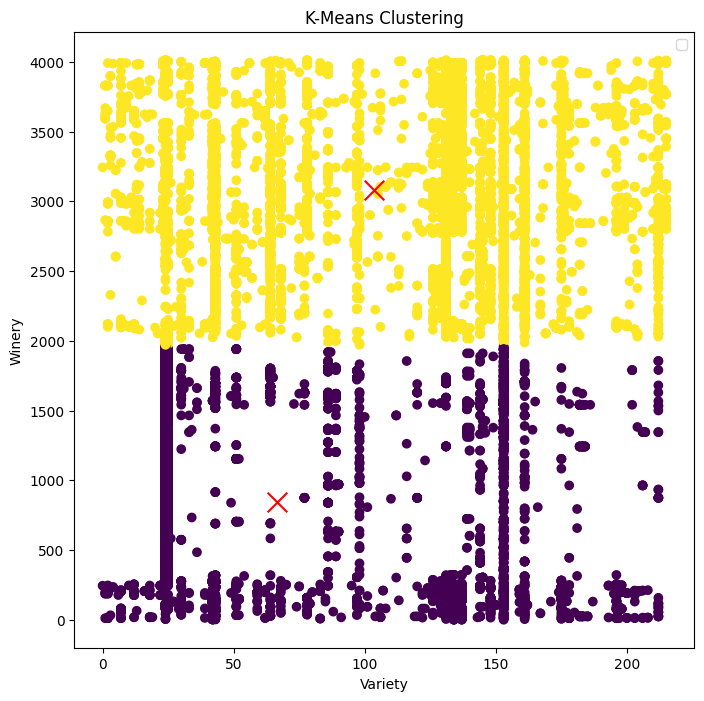

In [111]:
from sklearn.cluster import KMeans
feature_cols = ['variety', 'winery', 'location', 'year']
x_data = wd3[feature_cols]
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_data)
import matplotlib.pyplot as plt
plt.scatter(x_data['variety'], x_data['winery'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
plt.xlabel('Variety')
plt.ylabel('Winery')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [112]:
def cross_validate(x,y,kf_split):
    from sklearn.model_selection import KFold
    kf =KFold(n_splits=kf_split,shuffle=True,random_state=1)
    for train_index, test_index in kf.split(x):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    return [X_train,y_train,X_test,y_test]

In [41]:
from sklearn.ensemble import IsolationForest
feature_cols = ['variety', 'winery', 'location', 'year']
x_data = wd3[feature_cols]
y_data = wd3['points']
iso_forest = IsolationForest(contamination=0.05, random_state=1)
iso_forest.fit(x_data)
anomalies = iso_forest.predict(x_data)
wd3['anomaly'] = anomalies
print("Number of anomalies detected:", wd3[wd3['anomaly'] == -1].shape[0])

Number of anomalies detected: 1276


In [40]:
def pred_techniques(x,y,kf_split):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.neural_network import MLPRegressor
    train_test = cross_validate(x,y,kf_split)
    reg = DecisionTreeRegressor(random_state=1)
    reg.fit(train_test[0], train_test[1])
    clf = MLPRegressor(solver='adam', alpha=1e-5, activation='relu',learning_rate_init =0.01,shuffle=True,hidden_layer_sizes=(7, 4),random_state=1)
    clf.fit(train_test[0],train_test[1])
    return [reg,clf,train_test[2],train_test[3],train_test[0],train_test[1]]

In [52]:
feature_cols =  ['variety','winery','location', 'year']
x_data = wd3[feature_cols]
y_data = wd3['points']
l = pred_techniques(x_data,y_data,100)
print("Fig.5: Feature Significance")
pd.DataFrame([ "%.2f%%" % perc for perc in (l[0].feature_importances_ * 100) ], index = x_data.columns, columns = ['Feature Significance in Decision Tree'])

Fig.5: Feature Significance


,Feature Significance in Decision Tree
variety,17.31%
winery,34.28%
location,31.78%
year,16.63%


# **Evaluation**

In [53]:
r2_tree = l[0].score(l[2],l[3])
r2_nn = l[1].score(l[2],l[3])

print("Decision Tree Regressor")
print("="*32)
print("R Square:",r2_tree )


print("\nMulti-Layer Perceptron Regressor")
print("="*32)
print("R Square:",r2_nn)

Decision Tree Regressor
R Square: 0.2782758795086844

Multi-Layer Perceptron Regressor
R Square: 0.02065691899668376


In [54]:
results= l[2].copy()
results['Actual Points']=l[3]
pred_tree=l[0].predict(l[2])
pred_mlp=l[1].predict(l[2])
results['Dec_Tree_Reg']=pred_tree
results['MLP_Regressor']=pred_mlp
print("Fig.6: Actual Points and Predicted Points yielded from both Models")
results.head()

Fig.6: Actual Points and Predicted Points yielded from both Models


,variety,winery,location,year,Actual Points,Dec_Tree_Reg,MLP_Regressor
96,64,2977,324,2015,88,87.0,88.700308
151,137,2980,1,2014,91,90.0,87.549230
887,137,3346,160,2009,90,87.0,88.542322
1339,153,2314,113,2016,90,88.0,88.596324
1377,137,3640,160,2007,86,83.0,88.389821


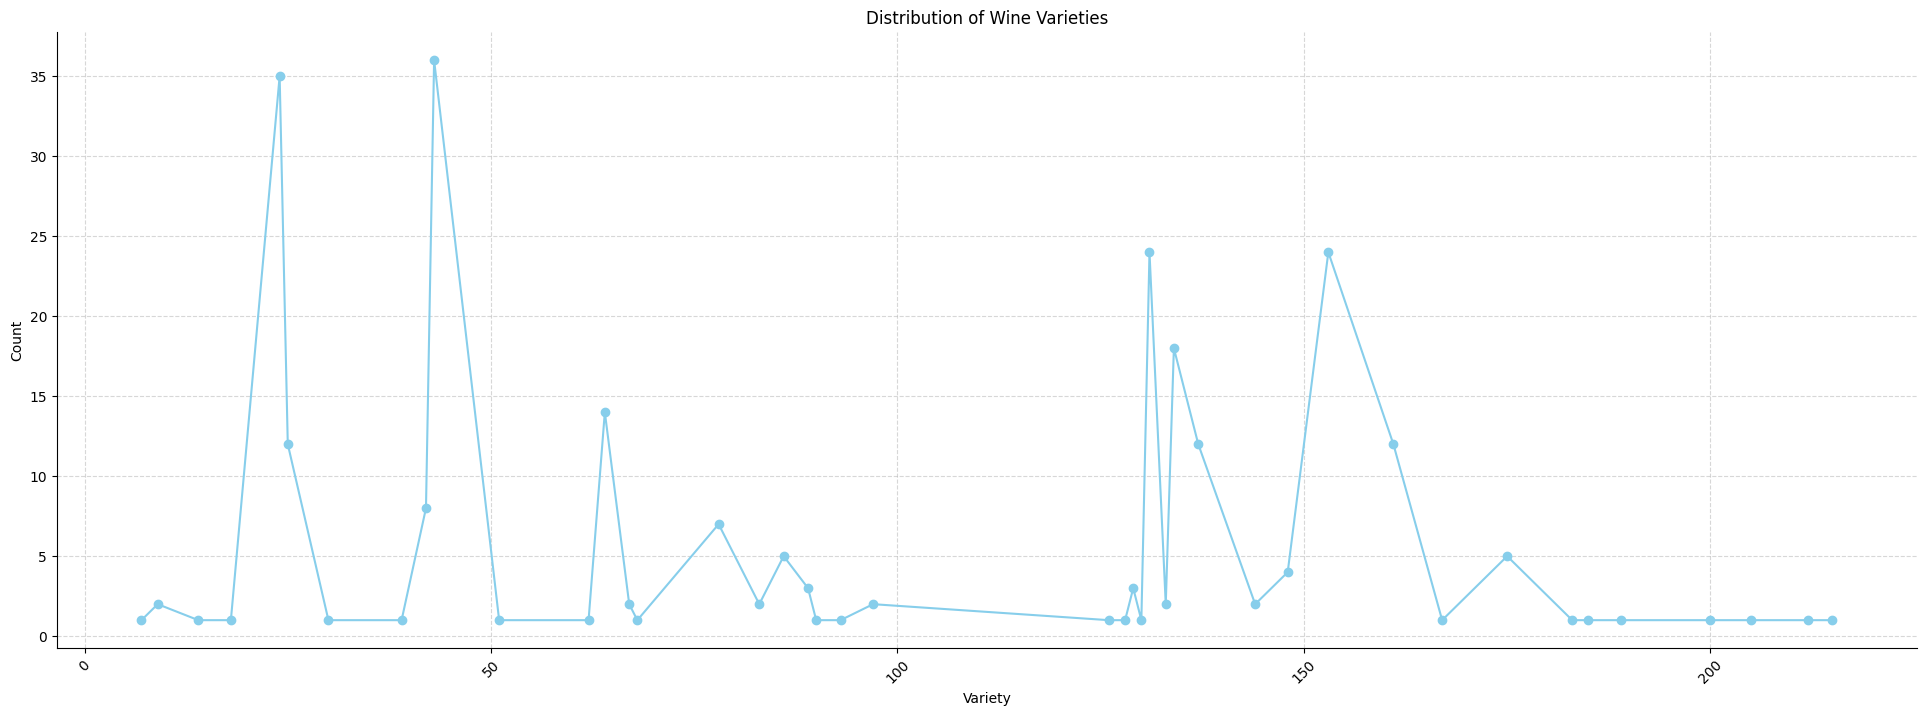

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 8))
results['variety'].value_counts().sort_index().plot(kind='line', marker='o', color='skyblue')
plt.title('Distribution of Wine Varieties')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

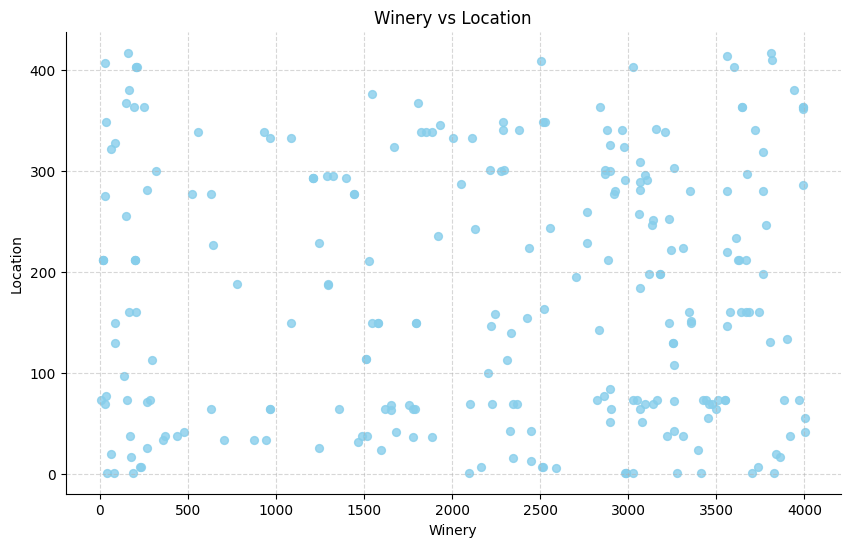

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(results['winery'], results['location'], s=32, alpha=0.8, color='skyblue')
plt.xlabel('Winery')
plt.ylabel('Location')
plt.title('Winery vs Location')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

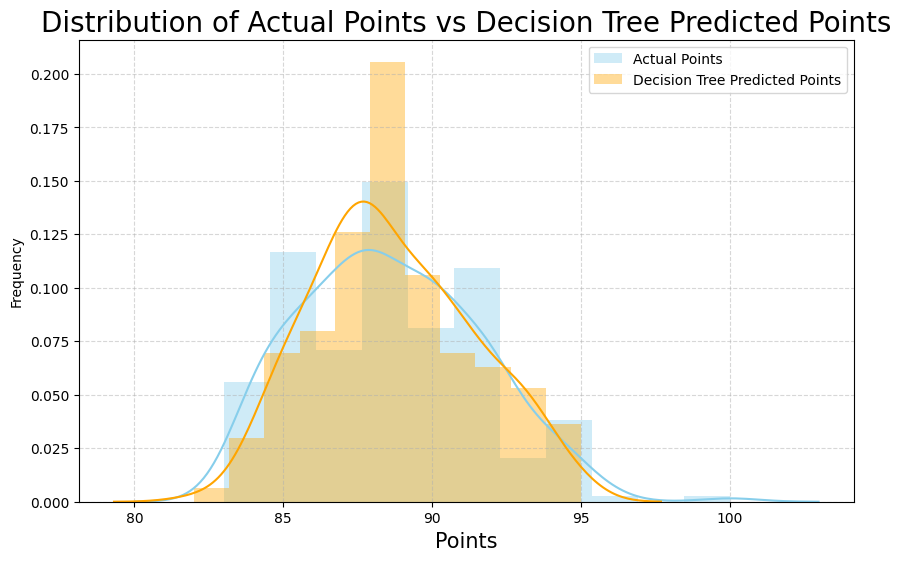

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(results["Actual Points"], color="skyblue", label="Actual Points")
sns.distplot(results["Dec_Tree_Reg"], color="orange", label="Decision Tree Predicted Points")
plt.xlabel("Points", size=15)
plt.ylabel("Frequency")
plt.title("Distribution of Actual Points vs Decision Tree Predicted Points", size=20)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

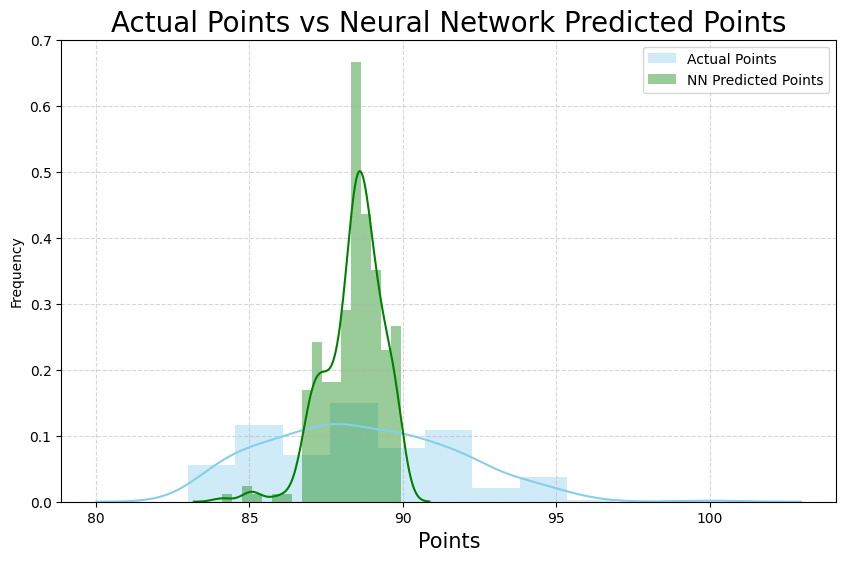

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(results["Actual Points"], color="skyblue", label="Actual Points")
sns.distplot(results["MLP_Regressor"], color="green", label="NN Predicted Points")
plt.xlabel("Points", size=15)
plt.ylabel("Frequency")
plt.title("Actual Points vs Neural Network Predicted Points", size=20)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [85]:
mse_treg = mean_squared_error(l[3],pred_tree)
mse_nn = mean_squared_error(l[3],pred_mlp)
rmse_treg = math.sqrt(mean_squared_error(l[3],pred_tree))
rmse_nn = math.sqrt(mean_squared_error(l[3],pred_mlp))
mae_treg = mean_absolute_error(l[3],pred_tree)
mae_nn = mean_absolute_error(l[3],pred_mlp)

print("Decision Tree Regressor")
print("="*32)
print("MSE:",mse_treg)
print("RMSE:",rmse_treg)
print("MAE:",mae_treg)

print("\nMulti-Layer Perceptron Regressor")
print("="*32)
print("MSE:",mse_nn)
print("RMSE:",rmse_nn)
print("MAE:",mae_nn)

Decision Tree Regressor
MSE: 6.511155827763204
RMSE: 2.551696656690055
MAE: 1.7793059446000625

Multi-Layer Perceptron Regressor
MSE: 8.83530871174624
RMSE: 2.9724247192731794
MAE: 2.4461136997748896


In [89]:
print("Number of Perfect Predictions:")
print("Decision Tree:", results[results['Dec_Tree_Reg'] == results['Actual Points']].shape[0])
print("Neural Network:", results[results['MLP_Regressor'] == results['Actual Points']].shape[0])

Number of Perfect Predictions:
Decision Tree: 62
Neural Network: 0


In [98]:
print("Fig.9: Summary of Evaluation Metrics")
pd.DataFrame(dict(R_Square= [r2_tree,r2_nn],MSE=[mse_treg,mse_nn], RMSE=[rmse_treg,rmse_nn],MAE=[mae_treg,mae_nn]),index=['Dec Tree Reg','MLP Reg'])

Fig.9: Summary of Evaluation Metrics


,R_Square,MSE,RMSE,MAE
Dec Tree Reg,0.278276,6.511156,2.551697,1.779306
MLP Reg,0.020657,8.835309,2.972425,2.446114


# **Summary**

---


In this experiment, the Decision Tree Regressor performed better than the MLP Regressor. The R2 score, also known as the coefficient of determination, was 0.278 for the Decision Tree Regressor and 0.020657 for the MLP Regressor. These scores indicate that both models did not fit the data very well. However, the standard deviations (RMSE) of both models were relatively low, suggesting that the observations are not widely spread from the actual points. This indicates that the models performed reasonably well. The Decision Tree Regressor had a standard deviation of 2.551697, while the MLP Regressor had a standard deviation of 2.972425.

---



In [109]:
results.describe()

,variety,winery,location,year,Actual Points,Dec_Tree_Reg,MLP_Regressor
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,91.368627,2182.156863,179.996078,1893.298039,88.643137,88.693374,88.400031
std,54.955865,1275.142403,126.903103,474.266235,3.009516,2.712218,0.940336
min,7.000000,5.000000,1.000000,0.000000,83.000000,82.000000,84.122321
25%,43.000000,1212.000000,64.000000,2009.000000,86.000000,87.000000,87.932542
50%,86.000000,2427.000000,160.000000,2012.000000,88.000000,88.000000,88.522811
75%,137.000000,3252.000000,294.000000,2014.000000,91.000000,90.875000,88.997543
max,215.000000,4006.000000,417.000000,2016.000000,100.000000,95.000000,89.940443
